# Projeto 2

# Luiza Coutinho e Giulia Roggero

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola

# Com base nas variaveis da base de micro dados disponibilizada no link acima, esse projeto tem o intuito usar as colunas: nº de participantes do ENEM, Estados do Brasil, Média da nota do ENEM, Porte da escola e localização da escola, prever se uma escola é pública ou privada.

Eliminamos as colunas que consideramos não necessárias, pois não iriam afetar a resposta que procurávamos, para contruir um modelo para a nossa previsão.
Escolhemos como variável TARGET a coluna TIPO, que é uma coluna qual adicionamos transformando a coluna "TP_DEPENDENCIA_ADM_ESCOLA" de quantitativa para qualitativa, nomeando-a de "TIPO", visto que tornaria nossa análise exploratória e nosso modelo melhor e mais preciso quando fossemos realizá-los.
A nossa variável TARGET ("TIPO") diz se os dados referentes a aquela linha são de uma escola pública ou privada.

# Dicionário das váriaveis FEATURES:

 ### Quantitativas:

NU_PARTICIPANTES: Número de Participantes do Enem que cumprem os requisitos de participação no cálculo da média e possui necessidade especial.
    NU_MEDIA_TOT: Média Total (Redação e Prova Objetiva) Ensino Médio Regular corrigida pelo número de participantes.

### Qualitativas:

SG_UF_ESCOLA: Sigla da Unidade da Federação da escola.
PORTE_ESCOLA: O indicador de porte da escola defini o tamanho da escola pelo número de alunos matriculados no último ano do Ensino médio.
TP_LOCALIZACAO_ESCOLA: Tipo de Localização da escola. 

Escolhemos tais variáveis como FEATURES, pois consideramos que essas iriam colaborar com o desenvolvimento do nosso objetivo neste projeto.

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from IPython.display import display
import seaborn as sns

In [26]:
dados = pd.read_csv('data.csv',encoding='ISO-8859-1', sep=';', low_memory=False)
dados


,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,NU_PARTICIPANTES,NU_MEDIA_TOT,PORTE_ESCOLA,Unnamed: 8,TP_LOCALIZACAO_ESCOLA
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,140,69.03,Maior que 90 alunos,NaN,1
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,139,57.82,Maior que 90 alunos,NaN,1
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,145,64.83,Maior que 90 alunos,NaN,1
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,171,NaN,Maior que 90 alunos,NaN,1
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,12,58.84,De 1 a 30 alunos,NaN,1
...,...,...,...,...,...,...,...,...,...,...
172300,2013,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,147,NaN,Maior que 90 alunos,NaN,1
172301,2014,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,100,NaN,Maior que 90 alunos,NaN,1
172302,2015,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,152,NaN,Maior que 90 alunos,NaN,1
172303,2014,DF,BrasÃ­lia,COL IMPACTO,4,10,NaN,De 1 a 30 alunos,NaN,1


In [27]:
data = pd.read_csv('data.csv',encoding='ISO-8859-1', sep=';', low_memory=False)
data

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,NU_PARTICIPANTES,NU_MEDIA_TOT,PORTE_ESCOLA,Unnamed: 8,TP_LOCALIZACAO_ESCOLA
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,140,69.03,Maior que 90 alunos,NaN,1
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,139,57.82,Maior que 90 alunos,NaN,1
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,145,64.83,Maior que 90 alunos,NaN,1
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,171,NaN,Maior que 90 alunos,NaN,1
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,12,58.84,De 1 a 30 alunos,NaN,1
...,...,...,...,...,...,...,...,...,...,...
172300,2013,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,147,NaN,Maior que 90 alunos,NaN,1
172301,2014,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,100,NaN,Maior que 90 alunos,NaN,1
172302,2015,DF,BrasÃ­lia,CED 310 DE SANTA MARIA,2,152,NaN,Maior que 90 alunos,NaN,1
172303,2014,DF,BrasÃ­lia,COL IMPACTO,4,10,NaN,De 1 a 30 alunos,NaN,1


In [28]:
filtra_ano = data['NU_ANO']==2006
datacerta = data.loc[filtra_ano,:]
datacerta

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,NU_PARTICIPANTES,NU_MEDIA_TOT,PORTE_ESCOLA,Unnamed: 8,TP_LOCALIZACAO_ESCOLA
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,139,57.82,Maior que 90 alunos,NaN,1
8,2006,RO,Porto Velho,INTERATIVO CURSOS E COLEGIO,4,32,43.73,De 61 a 90 alunos,NaN,1
11,2006,RO,Porto Velho,CENTRO EDUC OBJETIVO JUNIOR,4,26,51.69,De 31 a 60 alunos,NaN,1
16,2006,RO,Porto Velho,COLEGIO DOM BOSCO,4,71,53.91,Maior que 90 alunos,NaN,1
19,2006,RO,Porto Velho,COLEGIO PITAGORAS,4,20,45.64,De 31 a 60 alunos,NaN,1
...,...,...,...,...,...,...,...,...,...,...
67586,2006,DF,BrasÃ­lia,COL MAXWELL,4,11,52.52,De 61 a 90 alunos,NaN,1
67590,2006,DF,BrasÃ­lia,CED LEONARDO DA VINCI,4,60,62.40,Maior que 90 alunos,NaN,1
67594,2006,DF,BrasÃ­lia,CEM STELLA DOS CHERUBINS GUIMARAES TROIS,2,128,42.45,Maior que 90 alunos,NaN,1
67598,2006,DF,BrasÃ­lia,INST DE EDUC NDA SENIOR,4,32,59.81,Maior que 90 alunos,NaN,1


In [29]:
datacerta.loc[datacerta.TP_DEPENDENCIA_ADM_ESCOLA<4,"TIPO"]="PU"
datacerta.loc[datacerta.TP_DEPENDENCIA_ADM_ESCOLA==4,"TIPO"]="PV"
datacerta.TIPO.value_counts()

C:\Users\LuCoutinho\AppData\Local\Temp\ipykernel_2536\3938727606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacerta.loc[datacerta.TP_DEPENDENCIA_ADM_ESCOLA<4,"TIPO"]="PU"


PU    12161
PV     3491
Name: TIPO, dtype: int64

In [84]:
datacerta.loc[datacerta.TP_LOCALIZACAO_ESCOLA==1,"LOCALIZACAO"]="Urbana"
datacerta.loc[datacerta.TP_LOCALIZACAO_ESCOLA==2,"LOCALIZACAO"]="Rural"
datacerta.LOCALIZACAO.value_counts()

Urbana    15191
Rural       461
Name: LOCALIZACAO, dtype: int64

## Target: 'TIPO'
## Features: SG_UF_ESCOLA ,NU_PARTICIPANTES,	NU_MEDIA_TOT	,PORTE_ESCOLA,TP_LOCALIZACAO


In [85]:
datacerta

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,NU_PARTICIPANTES,NU_MEDIA_TOT,PORTE_ESCOLA,Unnamed: 8,TP_LOCALIZACAO_ESCOLA,TIPO,LOCALIZACAO
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,139,57.82,Maior que 90 alunos,NaN,1,PV,Urbana
8,2006,RO,Porto Velho,INTERATIVO CURSOS E COLEGIO,4,32,43.73,De 61 a 90 alunos,NaN,1,PV,Urbana
11,2006,RO,Porto Velho,CENTRO EDUC OBJETIVO JUNIOR,4,26,51.69,De 31 a 60 alunos,NaN,1,PV,Urbana
16,2006,RO,Porto Velho,COLEGIO DOM BOSCO,4,71,53.91,Maior que 90 alunos,NaN,1,PV,Urbana
19,2006,RO,Porto Velho,COLEGIO PITAGORAS,4,20,45.64,De 31 a 60 alunos,NaN,1,PV,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
67586,2006,DF,BrasÃ­lia,COL MAXWELL,4,11,52.52,De 61 a 90 alunos,NaN,1,PV,Urbana
67590,2006,DF,BrasÃ­lia,CED LEONARDO DA VINCI,4,60,62.40,Maior que 90 alunos,NaN,1,PV,Urbana
67594,2006,DF,BrasÃ­lia,CEM STELLA DOS CHERUBINS GUIMARAES TROIS,2,128,42.45,Maior que 90 alunos,NaN,1,PU,Urbana
67598,2006,DF,BrasÃ­lia,INST DE EDUC NDA SENIOR,4,32,59.81,Maior que 90 alunos,NaN,1,PV,Urbana


In [62]:
datacerta.dtypes

NU_ANO                         int64
SG_UF_ESCOLA                  object
NO_MUNICIPIO_ESCOLA           object
NO_ESCOLA_EDUCACENSO          object
TP_DEPENDENCIA_ADM_ESCOLA      int64
NU_PARTICIPANTES               int64
NU_MEDIA_TOT                 float64
PORTE_ESCOLA                  object
Unnamed: 8                   float64
TP_LOCALIZACAO_ESCOLA          int64
TIPO                          object
dtype: object

# Análise exploratória - Quantitativas

# Número de participantes x Média das notas no ENEM


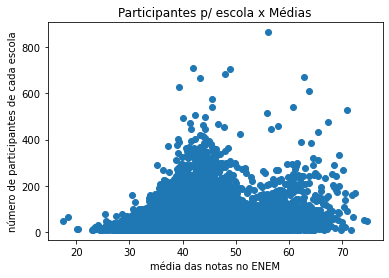

In [120]:
#media com numero de participantes 
plt.scatter(datacerta.NU_MEDIA_TOT,datacerta.NU_PARTICIPANTES)
plt.title("Participantes p/ escola x Médias")
plt.xlabel("média das notas no ENEM")
plt.ylabel("número de participantes de cada escola")
plt.show()

Começamos nossa análise exploratoria com o único gráfico com ambas as variáveis quantitativas. O gráfico consegue nos informar a média da nota do ENEM das escolas com base no número de alunos que participaram de cada escola.Fica claro analisando que a maioria das escolas com número de participantes menor que 600 tem médias semelhantes (entre 60 e 30).


#  Análise exploratória - Quantitativas e Qualitativas

Para a etapa da análise exploratória utilizamos a variável TARGET e as FEATURES para 

# Média de notas no ENEM em escolas públicas e privadas

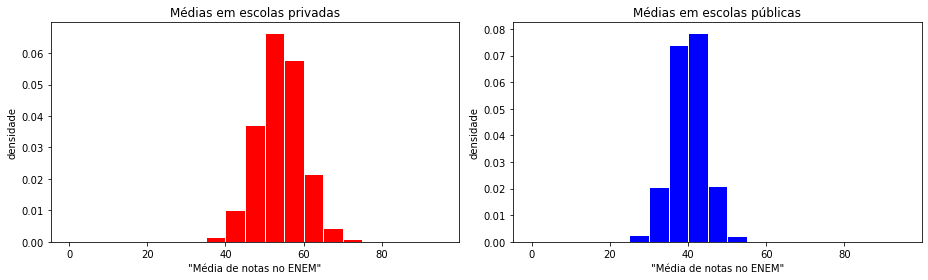

In [119]:
#média em escola publica ou privada
faixa=arange(0,100,5)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.hist(datacerta.NU_MEDIA_TOT[datacerta.TIPO=="PV"],bins=faixa,edgecolor="white",density=True,color="red")
plt.title('Médias em escolas privadas')
plt.ylabel('densidade')
plt.xlabel('"Média de notas no ENEM"')



plt.subplot(122)
plt.hist(datacerta.NU_MEDIA_TOT[datacerta.TIPO=="PU"],bins=faixa,edgecolor="white",density=True,color="blue")
plt.title('Médias em escolas públicas')
plt.ylabel('densidade')
plt.xlabel('"Média de notas no ENEM"')
plt.tight_layout()
plt.show()

Para realizar os gráficos a cima, relacionando as variáveis de média de notas no ENEM nos diferentes tipos de escolas (públicas e privadas),utilizamos histogramas. A partir da análise visual, fica claro que nas escolas privadas as médias das notas no ENEM são maiores que as médias de notas nas escolas privadas. 

# Média de notas no ENEM x Porte da escola 

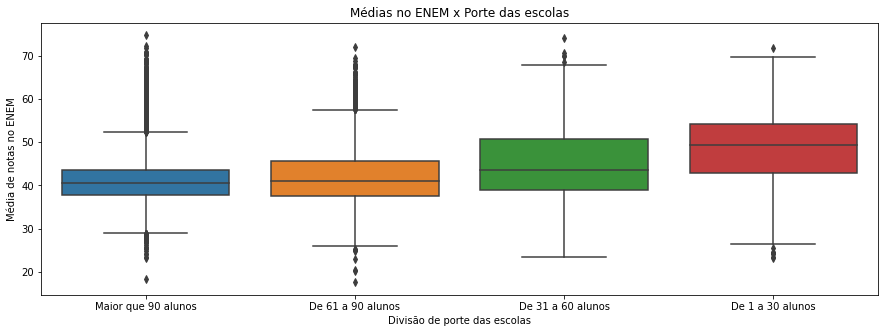

In [122]:
#médias e porte escolas
plt.figure(figsize=(15,5))
sns.boxplot(data=datacerta, x="PORTE_ESCOLA", y="NU_MEDIA_TOT")
plt.title("Médias no ENEM x Porte das escolas")
plt.xlabel("Divisão de porte das escolas")
plt.ylabel("Média de notas no ENEM")
plt.show()

Já para a análise das variáveis médias de notas no ENEM e porte das escolas utilizamos o formato de gráfico chamado de boxplot.Com esse resultado vimos que as escolas que possuem menos alunos tem uma mediana, da média de notas no ENEM, maior do que as escolas com porte maior. Os outros 3 tipos de porte possuem uma mediana próxima.

# Média de notas no ENEM x Estado do Brasil

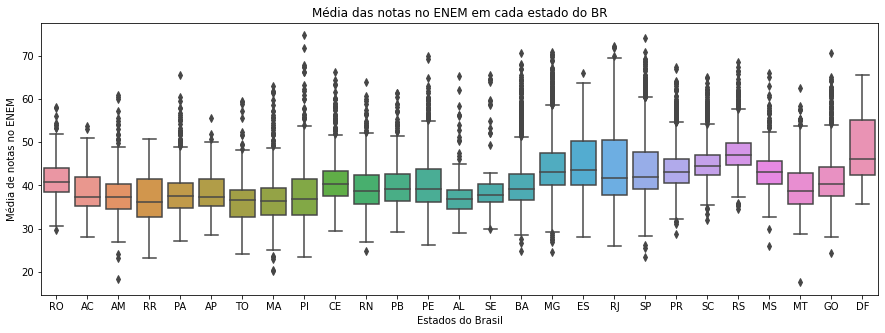

In [123]:
#media nos estados
plt.figure(figsize=(15,5))
sns.boxplot(data=datacerta, x="SG_UF_ESCOLA", y="NU_MEDIA_TOT")
plt.title("Média das notas no ENEM em cada estado do BR")
plt.xlabel("Estados do Brasil")
plt.ylabel("Média de notas no ENEM")
plt.show()

Analisando as variáveis: estados e média de notas no ENEM por meio de um boxplot, vimos que os estados da região Sudeste do Brasil tem medianas( da média de notas) maior do que os estados de outras regiões.Além disso, fica nítido que o RS tem a mediana maior e que o RJ tem a maior nota. Com esse gráfico conseguimos visualizar o desempenho das escolas de cada estado no ENEM.

# Número de participantes no ENEM x Localização da escola ( Rural / Urbana)

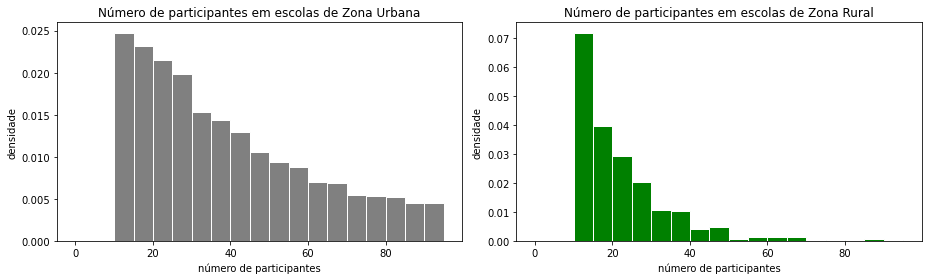

In [157]:
#participantes nas diferentes zonas
faixa=arange(0,100,5)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.hist(datacerta.NU_PARTICIPANTES[datacerta.LOCALIZACAO=="Urbana"],bins=faixa,edgecolor="white",density=True,color="grey")
plt.title('Número de participantes em escolas de Zona Urbana')
plt.ylabel('densidade')
plt.xlabel('número de participantes')



plt.subplot(122)
plt.hist(datacerta.NU_PARTICIPANTES[datacerta.LOCALIZACAO=="Rural"],bins=faixa,edgecolor="white",density=True,color="green")
plt.title('Número de participantes em escolas de Zona Rural')
plt.ylabel('densidade')
plt.xlabel('número de participantes')
plt.tight_layout()
plt.show()





Para analisar a relação entre o número de participantes com escolas de Zona ubarna e Zona rural , realizamos um histograma de cada zona com o número de participantes para entender seu comportamento e como o número de participantes pode ser afetado função de cada zona. Pelo comportamento dos histogramas foi possível perceber que as escolas de zona urbana possuem mais participantes em comparação com a zona rural.

# Médias de notas no ENEM x Localização da escola (Rural / Urbana)

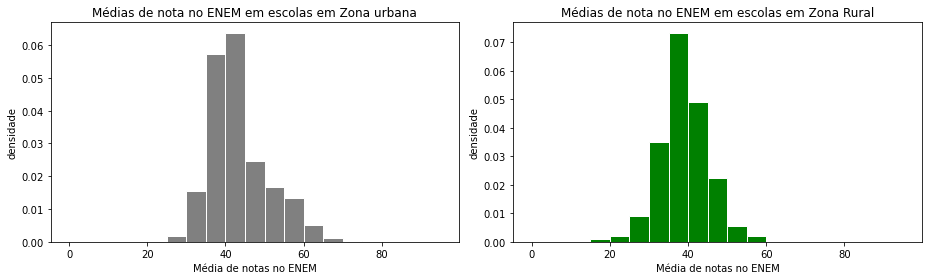

In [158]:
#Média de notas no ENEM nas diferentes zonas
faixa=arange(0,100,5)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.hist(datacerta.NU_MEDIA_TOT[datacerta.LOCALIZACAO=="Urbana"],bins=faixa,edgecolor="white",density=True,color="grey")
plt.title('Médias de nota no ENEM em escolas em Zona urbana')
plt.ylabel('densidade')
plt.xlabel("Média de notas no ENEM")



plt.subplot(122)
plt.hist(datacerta.NU_MEDIA_TOT[datacerta.LOCALIZACAO=="Rural"],bins=faixa,edgecolor="white",density=True,color="green")
plt.title('Médias de nota no ENEM em escolas em Zona Rural')
plt.ylabel('densidade')
plt.xlabel("Média de notas no ENEM")
plt.tight_layout()
plt.show()



Para analisar a relação entre o número de participantes em escolas de Zona ubarna e Zona rural com a média de notas, realizamos um histograma de cada zona com a média para entender seu comportamento e como a média pode ser afetada em função de cada zona. Pelo comportamento dos histogramas foi possível perceber que ambas as regiões tem média parecida por volta de 40, porém depois a densidade na zona urbana é maior.

# Número de participantes x Tipo de escola (Privada / Pública)

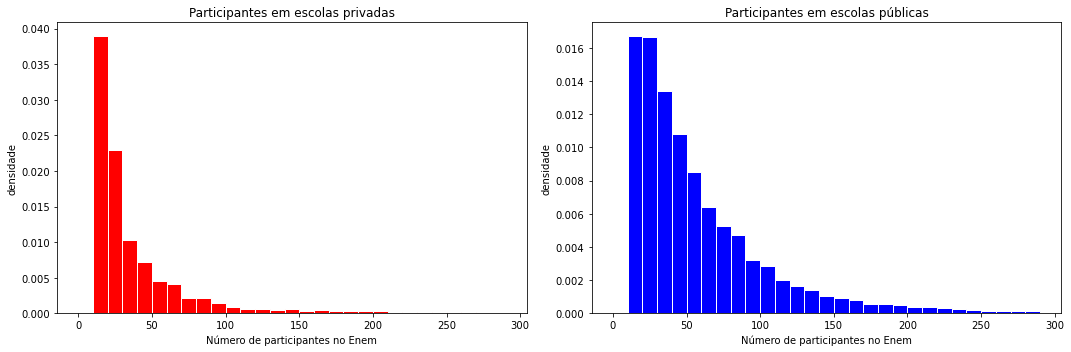

In [159]:
faixa=arange(0,300,10)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(datacerta.NU_PARTICIPANTES[datacerta.TIPO=="PV"],bins=faixa,edgecolor="white",density=True,color="red")
plt.title('Participantes em escolas privadas')
plt.ylabel('densidade')
plt.xlabel('Número de participantes no Enem')



plt.subplot(122)
plt.hist(datacerta.NU_PARTICIPANTES[datacerta.TIPO=="PU"],bins=faixa,edgecolor="white",density=True,color="blue")
plt.title('Participantes em escolas públicas')
plt.ylabel('densidade')
plt.xlabel('Número de participantes no Enem')
plt.tight_layout()
plt.show()

Para fazer a relação entre número de participantes do Enem de escolas privadas e escolas públicas, amabas variáveis qualitativas, fizemos um histograma de cada. Comparando os dois é percebe-se que existem mais participantes em escola pública do que privada, sendo uma informção relevante para a construção do nosso modelo.

# Análise Exploratória - Qualitativas

# Porte das escolas x Tipo (Pública / Privada)

<Figure size 936x504 with 0 Axes>

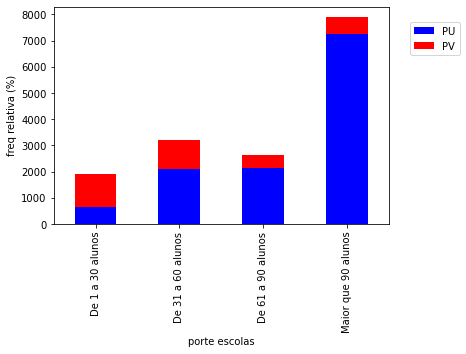

In [160]:
#tipo nos tamanhos
juncao_colunas=pd.crosstab(datacerta['PORTE_ESCOLA'],datacerta.TIPO)
plt.figure(figsize=(13, 7))
cores=['blue','red']
juncao_colunas.plot.bar(color=cores,stacked=True)
plt.ylabel('freq relativa (%)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05,0.95));
plt.xlabel("porte escolas")
plt.show()

Para a poder comparar a quantidade dos diferentes tamanhos das escolas públicas e privadas, plotamos esse gráfico que nos permite perceber que existem mais escolas públicas em todos os tamanhos das escolas.

# Porte das escolas x Localização (Rural / Urbana)

<Figure size 1080x360 with 0 Axes>

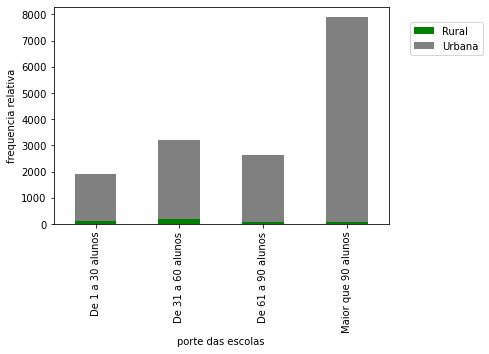

In [161]:
plt.figure(figsize=(15,5))
juncao_colunas=pd.crosstab(datacerta['PORTE_ESCOLA'],datacerta['LOCALIZACAO'])


cores=['green','grey']
juncao_colunas.plot.bar(color=cores,stacked=True)
plt.ylabel('frequencia relativa')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05,0.95));
plt.xlabel("porte das escolas")
plt.show()

Para a poder comparar a quantidade dos diferentes tamanhos das escolas de zona urbana e rural, plotamos esse gráfico que nos permite perceber que existem mais escolas urbanas em todos os tamanhos das escolas.

# Modelos de predição

# Modelo por árvore 

In [91]:
dados_limpos = datacerta.loc[:,['SG_UF_ESCOLA', 'NU_PARTICIPANTES', 'NU_MEDIA_TOT', 'PORTE_ESCOLA', 'TIPO','LOCALIZACAO']]

dados_dummy = pd.get_dummies(dados_limpos, drop_first=True)
X = dados_dummy.drop("TIPO_PV", axis = 1)
y = dados_dummy["TIPO_PV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)




# Validação - modelo árvore

In [92]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.945993031358885

In [93]:
predito = clf.predict(X_test)

In [94]:
pd.crosstab(predito, y_test)

TIPO_PV,0,1
row_0,,
0,3873,141
1,138,1014


# Modelo por Naive Bayes

In [95]:
dados_limpos = datacerta.loc[:,['SG_UF_ESCOLA', 'NU_PARTICIPANTES', 'NU_MEDIA_TOT', 'PORTE_ESCOLA', 'TIPO','LOCALIZACAO']]

dados_dummy = pd.get_dummies(dados_limpos, drop_first=True)
X = dados_dummy.drop("TIPO_PV", axis = 1)
y = dados_dummy["TIPO_PV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [155]:
dados_dummy

,NU_PARTICIPANTES,NU_MEDIA_TOT,SG_UF_ESCOLA_AL,SG_UF_ESCOLA_AM,SG_UF_ESCOLA_AP,SG_UF_ESCOLA_BA,SG_UF_ESCOLA_CE,SG_UF_ESCOLA_DF,SG_UF_ESCOLA_ES,SG_UF_ESCOLA_GO,...,SG_UF_ESCOLA_RS,SG_UF_ESCOLA_SC,SG_UF_ESCOLA_SE,SG_UF_ESCOLA_SP,SG_UF_ESCOLA_TO,PORTE_ESCOLA_De 31 a 60 alunos,PORTE_ESCOLA_De 61 a 90 alunos,PORTE_ESCOLA_Maior que 90 alunos,TIPO_PV,LOCALIZACAO_Urbana
1,139,57.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
8,32,43.73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
11,26,51.69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
16,71,53.91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
19,20,45.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67586,11,52.52,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
67590,60,62.40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
67594,128,42.45,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
67598,32,59.81,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


# Validação - modelo Naive Bayes

In [96]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8062330623306233

In [97]:
predito = clf.predict(X_test)

In [98]:
pd.crosstab(predito, y_test)

TIPO_PV,0,1
row_0,,
0,3155,145
1,856,1010


# Conclusão

O intuito do projeto era responder a pergunta : Com base nas variaveis: nº de participantes do ENEM, Estados do Brasil, Média da nota do ENEM, Porte da escola, localização da escola, é possivel prever se uma escola é pública ou privada?. 
Após a análise exploratória vimos que nossas variáveis features tinham muita relação com a variável Target fornecendo resultados nos quais era possível perceber a diferença entre os tipos de escola. Além disso, cruzamos variáveis features entre si para conseguir dados complementares que ajudassem no entedimento da base de dados e como os dados se relacionam.
Em seguida começamos a parte de modelagem. Utilizamos primeiramente um modelo de ÁRVORE DE DECISÃO, utilizado para classificação e regressão. O principal objetivo do modelo era prever a nossa variável "TIPO" através da aprendizagem de regras de decisão simples inferidas a partir das características dos dados das outras variáveis features. Começamos utilizando a função dummies, transformando variáveis qualitativas para quantitativas, e logo depois fizemos uma avaliação do modelo com um conjunto de dados de treinamento, para depois usar um conjunto de dados de teste, que iriam avaliar o desempenho do modelo. Esse processo foi realizado pela função "train_test_split". Por último, utilizamos a funçã tree.DecisionTreeClassifier e os dados adiquiridos previamente e chegamos em uma acurácia de aproximadamente 94,6%.

O segundo modelo que adotamos segue a mesma sintaxe do que o anterior porém outro estilo teórico. O Naive Bayes é um algoritmo de classificação probabilístico que se baseia no teorema de Bayes. Ele faz uma suposição simplificada, assumindo independência entre os atributos (variáveis preditoras) do conjunto de dados.Utilizando o mesmo código e somente trocando a função tree.DecisionTreeClassifier por GaussianNB , chegamos em uma acurácia de 80,6%

Com esses dados chegamos a conclusão que o modelo de Árvore de decisão é o mais bem sucedido e responderia a nossa pergunta com menos chances de erros.

# Referências

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/tree.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
https://scikit-learn.org/stable/modules/naive_bayes.html
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

link base de dados:https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola